<a href="https://colab.research.google.com/github/vkekd25/cp1_modeling/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 남은 전처리

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 라이브러리
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from category_encoders import OrdinalEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic')

In [5]:
# df주소는 각자 기호에 맞게 지정하셔야할 것 같습니다.
df = pd.read_csv('/content/drive/MyDrive/df_real_final.csv', encoding= 'utf-8').drop('Unnamed: 0', axis = 1)
df.head(1)

,title,price,article,like,view,category,location,time,web_types,unused,model,series,size,gps/cell,edition,material,like/views(%),quality,average_price,attention
0,애플워치 7 스테인리스 41mm실버 팝니다,600000.0,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,애플워치,7,41mm,gps,일반,stainless,1.202749,중,656400,359.0


In [6]:
df["like(%)"] = 100 * df["like"] / df["like"].max()
df["view(%)"] = 100 * df["view"] / df["view"].max()  

df["attention(%)"] = 0.95 * df["like(%)"] + 0.05* df["view(%)"]

In [7]:
df.head(1)

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
0,애플워치 7 스테인리스 41mm실버 팝니다,600000.0,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,...,gps,일반,stainless,1.202749,중,656400,359.0,2.405498,2.414287,2.405938


In [8]:
from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()

In [9]:
#attention rate 구하기

df["attention"]= 0.95 * df["like"] + 0.05* df["view"]

#확인
print( "Attention rate \n최대값 maximum :" , df["attention"].max() , " \n최소값 Attention rate minimum: ", df["attention"].min() )

Attention rate 
최대값 maximum : 2963.55  
최소값 Attention rate minimum:  0.0


## Category 전처리

In [10]:
# '삽니다' 제거
buy = df[df['category']=='삽니다'].index
df.drop(buy, inplace=True)

In [11]:
# 기타 상관 없는 row 제거
df = df[df["title"].str.contains("베젤링|스트립|스크랩|스타일링|풀커버|워치줄|band|가죽링크|체인|강화유리|브레이|배젤") == False]

In [12]:
df.shape

(12452, 23)

##시리즈 전처리

In [13]:
def change_series(x):
    if x == '4 clasic':
          x = '4 classic'
    return x

df.series = df.series.apply(change_series)

## Price 이상치 제거

In [14]:
# 아이폰, 갤럭시z 와 합쳐서 파는 row 제거

df = df[df["title"].str.contains("아이폰|갤럭시폴드|갤럭시z|일괄|세트|갤럭시S|갤럭시s|갤럭시Z|아이패드|펜슬|팬슬|아이 패드") == False]

In [15]:
# 999999같은 row 제거
df.drop([3518, 8778, 4219, 6380, 7025], inplace=True)

In [16]:
df.sort_values('price', ascending=False)[:1]

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
732,에르메스 에디션 애플워치7 45mm 실버,1050000.0,에르메스 에디션 애플워치 7세대 45mm 판매합니다. \n\n실버 모델이고요. \n...,5,356,웨어러블(워치),세종,NaN,1,0,...,gps,에르메스,aluminum,1.404494,중,1263600,22.55,0.859107,0.73839,0.853071


In [17]:
df.sort_values('price')[:1]

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
3533,애플워치SE 44mm,0.0,산지 한 달도 안 됐고 착용도 몇 번 안 한 제품 케이스랑 항상 차고 다녀서 기기에...,5,317,웨어러블(워치),경기도,NaN,1,0,...,gps,일반,aluminum,1.577287,중,450600,20.6,0.859107,0.657499,0.849026


In [18]:
# 29000원 미만 제거
df.drop(df[df['price'] < 29000].index, inplace=True)

In [19]:
# 최종 df shape
df.shape

(12235, 23)

##Attention 이상치 제거

In [20]:
# attention 1000이상 행 제거
df = df[df.attention < 1000]

## 종류별 평균가

In [21]:
group = df.groupby(['model', 'series', 'edition', 'size', 'material', 'gps/cell']).price.mean().index
group

df.groupby(['model', 'series', 'edition', 'size', 'material', 'gps/cell']).price.mean()

dic = {}

for i in range(len(df.groupby(['model', 'series', 'edition', 'size', 'material', 'gps/cell']).price.mean().index)):
    dic[df.groupby(['model', 'series', 'edition', 'size', 'material', 'gps/cell']).price.mean().index[i]] =  df.groupby(['model', 'series', 'edition', 'size', 'material', 'gps/cell']).price.mean()[i]

In [22]:
df_temp = df[['model', 'series', 'edition', 'size', 'material', 'gps/cell']]

In [23]:
df_temp.head(3)

,model,series,edition,size,material,gps/cell
0,애플워치,7,일반,41mm,stainless,gps
1,애플워치,7,일반,41mm,stainless,gps
2,애플워치,7,일반,41mm,stainless,gps


In [24]:
results = []
for i in range(len(df)):
    result = dic[tuple(df_temp.iloc[i].tolist())] 
    results.append(result)

In [25]:
df['average_price'] = results

In [26]:
# 라벨링 오류 aluminum, titanum
df.material.unique()

array(['stainless', 'titanium', 'aluminum', 'aluminium', 'titanum'],
      dtype=object)

In [27]:
# alumium -> aluminium 정정!
def to_aluminium(x):
    if x == 'aluminum':
        x = 'aluminium'
    elif x == 'titanum':
        x = 'titanium'
    return x 
df.material = df.material.apply(to_aluminium)

In [28]:
# 행 중복 제거
df = df.drop_duplicates()

#price, location, web_types, unused, model, series, size, gps/cell, edition, material, like/views(%), quality, average_price, attention

In [29]:
df.shape

(11976, 23)

In [30]:
# 에디션 카테고리 영어를 한글로 통일

def eng_to_kor(x):
    if x == 'general':
        x = '일반'
    elif x == 'golf':
        x = '골프'
    return x

df.edition.apply(eng_to_kor)

0        일반
1        일반
2        일반
3        일반
4        일반
         ..
12770    일반
12771    골프
12773    일반
12774    일반
12775    일반
Name: edition, Length: 11976, dtype: object

In [31]:
df.edition = df.edition.apply(eng_to_kor)

In [32]:
df.edition.unique()

array(['일반', '에르메스', '골프'], dtype=object)

In [33]:
# 소수점 짜르기
df['price'] = [int(x) for x in df['price'].tolist()]

In [34]:
df.average_price.max()

985000.0

In [35]:
df[df['edition'] == '에르메스'].price.mean()

687158.5365853659

In [36]:
df.groupby(['model', 'series', 'edition', 'size', 'material', 'gps/cell']).price.mean()

model  series  edition  size  material   gps/cell 
갤럭시워치  1       일반       42mm  aluminium  bluetooth     57826.086957
                                         lte           65000.000000
                        46mm  aluminium  bluetooth     57750.000000
                                         lte           86166.666667
       3       골프       41mm  aluminium  bluetooth    360000.000000
                                                          ...      
애플워치   se      일반       40mm  aluminium  cellular     270449.541284
                                         gps          246803.881808
                        44mm  aluminium  cellular     296518.115942
                                         gps          265951.723048
                              stainless  gps          320000.000000
Name: price, Length: 118, dtype: float64

In [37]:
df[(df.model == '애플워치') & (df.series)]

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
0,애플워치 7 스테인리스 41mm실버 팝니다,600000,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,...,gps,일반,stainless,1.202749,중,635185.185185,71.50,2.405498,2.414287,2.405938
1,애플워치7 41mm 스테인리스 미사용팝니다,650000,\n처음에 한번켜보고 초기셋팅후 바로 박스에 보관되었던 제품입니다\n본체만입니다 밀...,3,118,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.542373,중,635185.185185,8.75,0.515464,0.244747,0.501928
2,애플워치7 41mm 스테인리스 실버 미사용팝니다,650000,\n본체만 있습니다 밀레니즈루프줄은 팔리고 없습니다\n스타라이트 스포츠밴드 하나 가...,3,123,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.439024,중,635185.185185,9.00,0.515464,0.255118,0.502447
3,애플워치 7 스테인리스 스틸 41mm,700000,"\n애플워치 7 스테인리스 스틸 41mm gps+셀룰러 모델이고, 그래파이트 색상입...",2,123,디지털기기,충남,1.000000,0,0,...,gps,일반,stainless,1.626016,중,635185.185185,8.05,0.343643,0.255118,0.339216
4,애플워치 7 41mm 골드 스테인리스 새제품,880000,\n1달전 구매후 1회 말그대로 시착만 하고 디지털 시계가 안어울려\n내놓습니다 \...,0,65,디지털기기,서울,2.000000,0,0,...,gps,일반,stainless,0.000000,중,635185.185185,3.25,0.000000,0.134818,0.006741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,애플워치 2세대 38mm 스페이스 그레이,90000,안녕하세요. 애플워치 2세대 38mm 스페이스 그레이 제품 판매합니다. 구매시 함께...,19,478,웨어러블(워치),전북,NaN,1,0,...,gps,일반,aluminium,3.974895,하,84600.000000,41.95,3.264605,0.991434,3.150946
12075,애플워치 1세대 38mm,80000,"\n구성 : 워치, 충전기, 젤리케이스\n상태 : 생활기스 O\n ...",0,51,디지털기기,부산,0.208333,0,0,...,gps,일반,aluminium,0.000000,하,65000.000000,2.55,0.000000,0.105781,0.005289
12076,38mm 애플워치1,50000,\n애플워치 입문용으로 당근에서 구입했다가 재당근해요! 보시는바와 같이 생활기스 있...,5,151,디지털기기,서울,2.000000,0,0,...,gps,일반,aluminium,3.311258,하,65000.000000,12.30,0.859107,0.313194,0.831811
12078,애플워치 1세대 38mm,80000,"\n구성 : 워치, 충전기, 젤리케이스\n상태 : 생활기스 O\n ...",0,51,디지털기기,부산,0.208333,0,0,...,gps,일반,aluminium,0.000000,하,65000.000000,2.55,0.000000,0.105781,0.005289


# 1. EDA, 시각화
- 머신러닝에 적합한 형태로 데이터 타입을 변경
- 여러 테크닉을 사용해 결측치를 적절히 처리
- 본인의 전처리 과정에 대해 근거를 들어 설명
- 피쳐의 분포를 확인하고 이상치를 적절히 제거
- 1에서 세운 가설과 관련한 시각화 결과를 제시
- **태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다**
  - Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?
  - 특성과 타겟의 관계 및 가설을 충분히 설명할 수 있는 시각화 결과를 제시했나요?

## 지역별 가격

In [38]:
df.location.unique()

array(['충북', '서울', '충남', '부산', '경기도', '대구', '광주', '전국', '경남', '전북', '강원도',
       '인천', '대전', '경북', '울산', '세종', '제주', '전남'], dtype=object)

In [39]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

(210000.0, 265000.0)

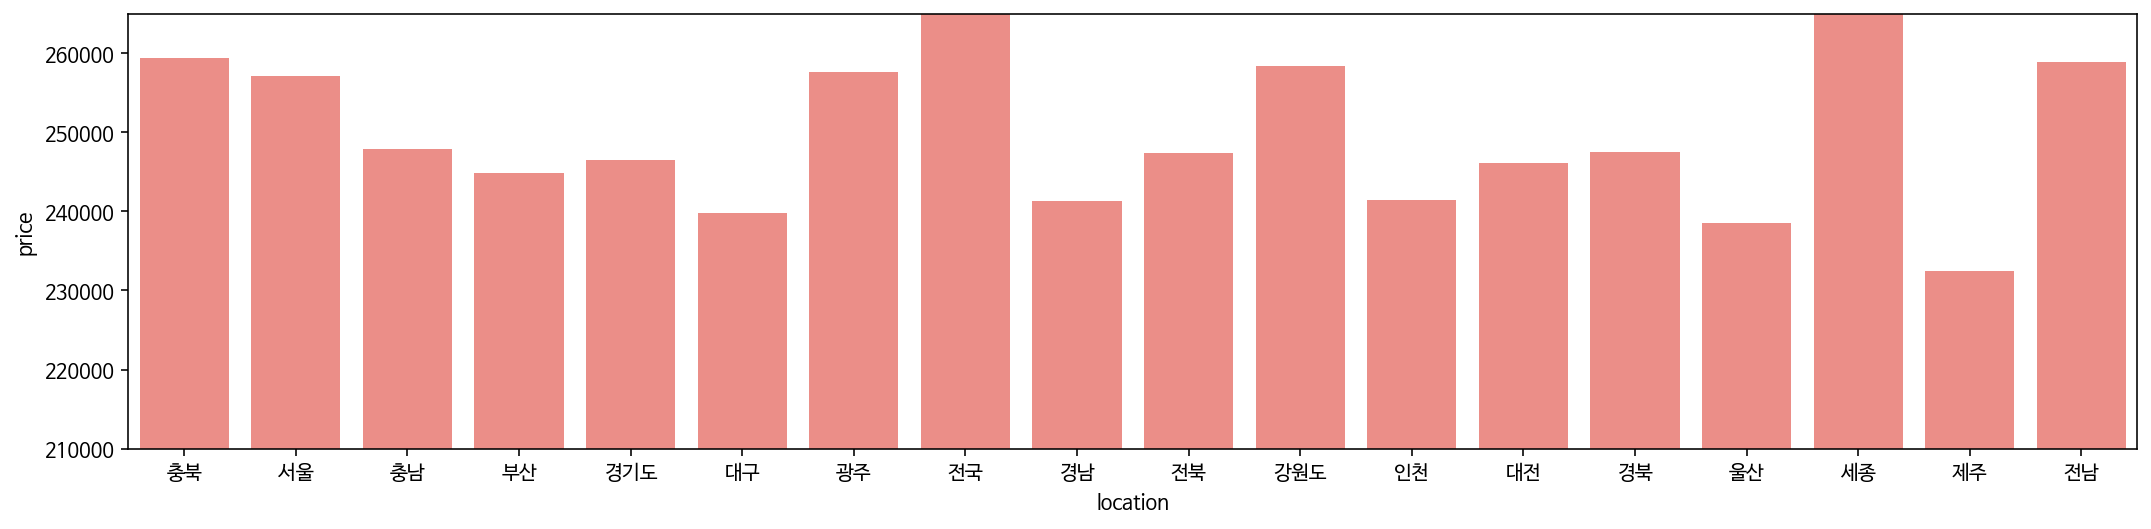

In [40]:
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(18,4))

sns.barplot(data=df, x="location", y="price", color = '#FC7F77', ci = False);
plt.ylim(210000, 265000)

**경상도, 전라도는 스마트 워치 시세가 서울, 경기도, 전라도에 비해서 전반적으로 낮다.**

## 날짜별 시세

In [41]:
df.shape

(11976, 23)

In [42]:
df_time = df.dropna().copy(deep = True)
df_time

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
0,애플워치 7 스테인리스 41mm실버 팝니다,600000,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,...,gps,일반,stainless,1.202749,중,635185.185185,71.50,2.405498,2.414287,2.405938
1,애플워치7 41mm 스테인리스 미사용팝니다,650000,\n처음에 한번켜보고 초기셋팅후 바로 박스에 보관되었던 제품입니다\n본체만입니다 밀...,3,118,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.542373,중,635185.185185,8.75,0.515464,0.244747,0.501928
2,애플워치7 41mm 스테인리스 실버 미사용팝니다,650000,\n본체만 있습니다 밀레니즈루프줄은 팔리고 없습니다\n스타라이트 스포츠밴드 하나 가...,3,123,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.439024,중,635185.185185,9.00,0.515464,0.255118,0.502447
3,애플워치 7 스테인리스 스틸 41mm,700000,"\n애플워치 7 스테인리스 스틸 41mm gps+셀룰러 모델이고, 그래파이트 색상입...",2,123,디지털기기,충남,1.000000,0,0,...,gps,일반,stainless,1.626016,중,635185.185185,8.05,0.343643,0.255118,0.339216
4,애플워치 7 41mm 골드 스테인리스 새제품,880000,\n1달전 구매후 1회 말그대로 시착만 하고 디지털 시계가 안어울려\n내놓습니다 \...,0,65,디지털기기,서울,2.000000,0,0,...,gps,일반,stainless,0.000000,중,635185.185185,3.25,0.000000,0.134818,0.006741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12769,갤럭시 워치4 40mm lte,120000,\n갤럭시워치4 40mm입니다. lte모델이지만 개통안하고 블루투스로 사용하셔도 되...,5,422,디지털기기,제주,1.000000,0,0,...,lte,일반,aluminium,1.184834,하,156590.909091,25.85,0.859107,0.875283,0.859915
12771,갤럭시 워치4 40mm 골프에디션 팝니다.,160000,\n전반적인 상태 양호합니다. \n액정에는 흠 같은 것 없이 깨끗합니다. \n테두리...,12,774,디지털기기,대구,1.000000,0,0,...,bluetooth,골프,aluminium,1.550388,하,195531.914894,50.10,2.061856,1.605376,2.039032
12773,갤럭시워치5pro 프로모션 등록조차 안한 새상품,420000,\n2022.8월 사전예약 당일\n프로모션 등록안해서 제품넘버 등록하면 악세사리 마...,9,760,디지털기기,서울,2.000000,0,0,...,bluetooth,일반,aluminium,1.184211,하,397255.078125,46.55,1.546392,1.576338,1.547889
12774,갤럭시 워치5 프로 팝니다.,350000,\n구매 후 2틀 사무실에서 착용 했습니다.\n눈에 띄지 않는 잔기스 조금 있네요....,2,393,디지털기기,충남,3.000000,0,0,...,bluetooth,일반,aluminium,0.508906,하,397255.078125,21.55,0.343643,0.815133,0.367217


In [43]:
df_time.time.max() # 시간 11일전이 최대

11.0

In [44]:
df.drop_duplicates().shape

(11976, 23)

In [45]:
df_time.time.min()

0.001

In [46]:
def time_to_sec(x):
    if x < 1:
        x = '당일'
    elif x < 2:
        x = '하루전'
    elif x < 3:
        x = '2일전'
    elif x < 3:
        x = '3일전'
    elif x < 4:
        x = '4일전'
    elif x < 5:
        x = '5일전'
    elif x < 6:
        x = '6일전'
    elif x < 7:
        x = '7일전'
    elif x < 8:
        x = '8일전'
    elif x < 9:
        x = '9일전'
    elif x < 10:
        x = '10일전'
    elif x <= 11:
        x = '11일전'
    return x

df_time['period'] = df_time.time.apply(time_to_sec)
# df_time.drop('구간', axis = 1, inplace = True)

In [47]:
df_time.head(3)

,title,price,article,like,view,category,location,time,web_types,unused,...,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%),period
0,애플워치 7 스테인리스 41mm실버 팝니다,600000,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,...,일반,stainless,1.202749,중,635185.185185,71.50,2.405498,2.414287,2.405938,당일
1,애플워치7 41mm 스테인리스 미사용팝니다,650000,\n처음에 한번켜보고 초기셋팅후 바로 박스에 보관되었던 제품입니다\n본체만입니다 밀...,3,118,디지털기기,서울,0.541667,0,0,...,일반,stainless,2.542373,중,635185.185185,8.75,0.515464,0.244747,0.501928,당일
2,애플워치7 41mm 스테인리스 실버 미사용팝니다,650000,\n본체만 있습니다 밀레니즈루프줄은 팔리고 없습니다\n스타라이트 스포츠밴드 하나 가...,3,123,디지털기기,서울,0.541667,0,0,...,일반,stainless,2.439024,중,635185.185185,9.00,0.515464,0.255118,0.502447,당일


In [48]:
df_time.material.unique()

array(['stainless', 'titanium', 'aluminium'], dtype=object)

In [49]:
df_time.period.unique()

id = ['당일', '하루전', '2일전', '4일전', '5일전', '6일전', '7일전', '8일전',
       '10일전', '11일전']

In [50]:
plt.figure(figsize=(5,4))

# sns.barplot(data=df_time, x= "period", y="price", color = '#FC7F77', ci = False);

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [51]:
df_time.groupby(['period']).price.mean().index = ['당일', '하루전', '2일전', '4일전', '5일전', '6일전', '7일전', '8일전',
       '10일전', '11일전']

In [52]:
df_time.groupby(['period']).price.mean()

period
10일전    181000.000000
11일전    240000.000000
2일전     242856.624909
4일전     239631.298793
5일전     233592.456869
6일전     199426.470588
7일전     167865.853659
8일전     167500.000000
당일      252155.680767
하루전     242085.243974
Name: price, dtype: float64

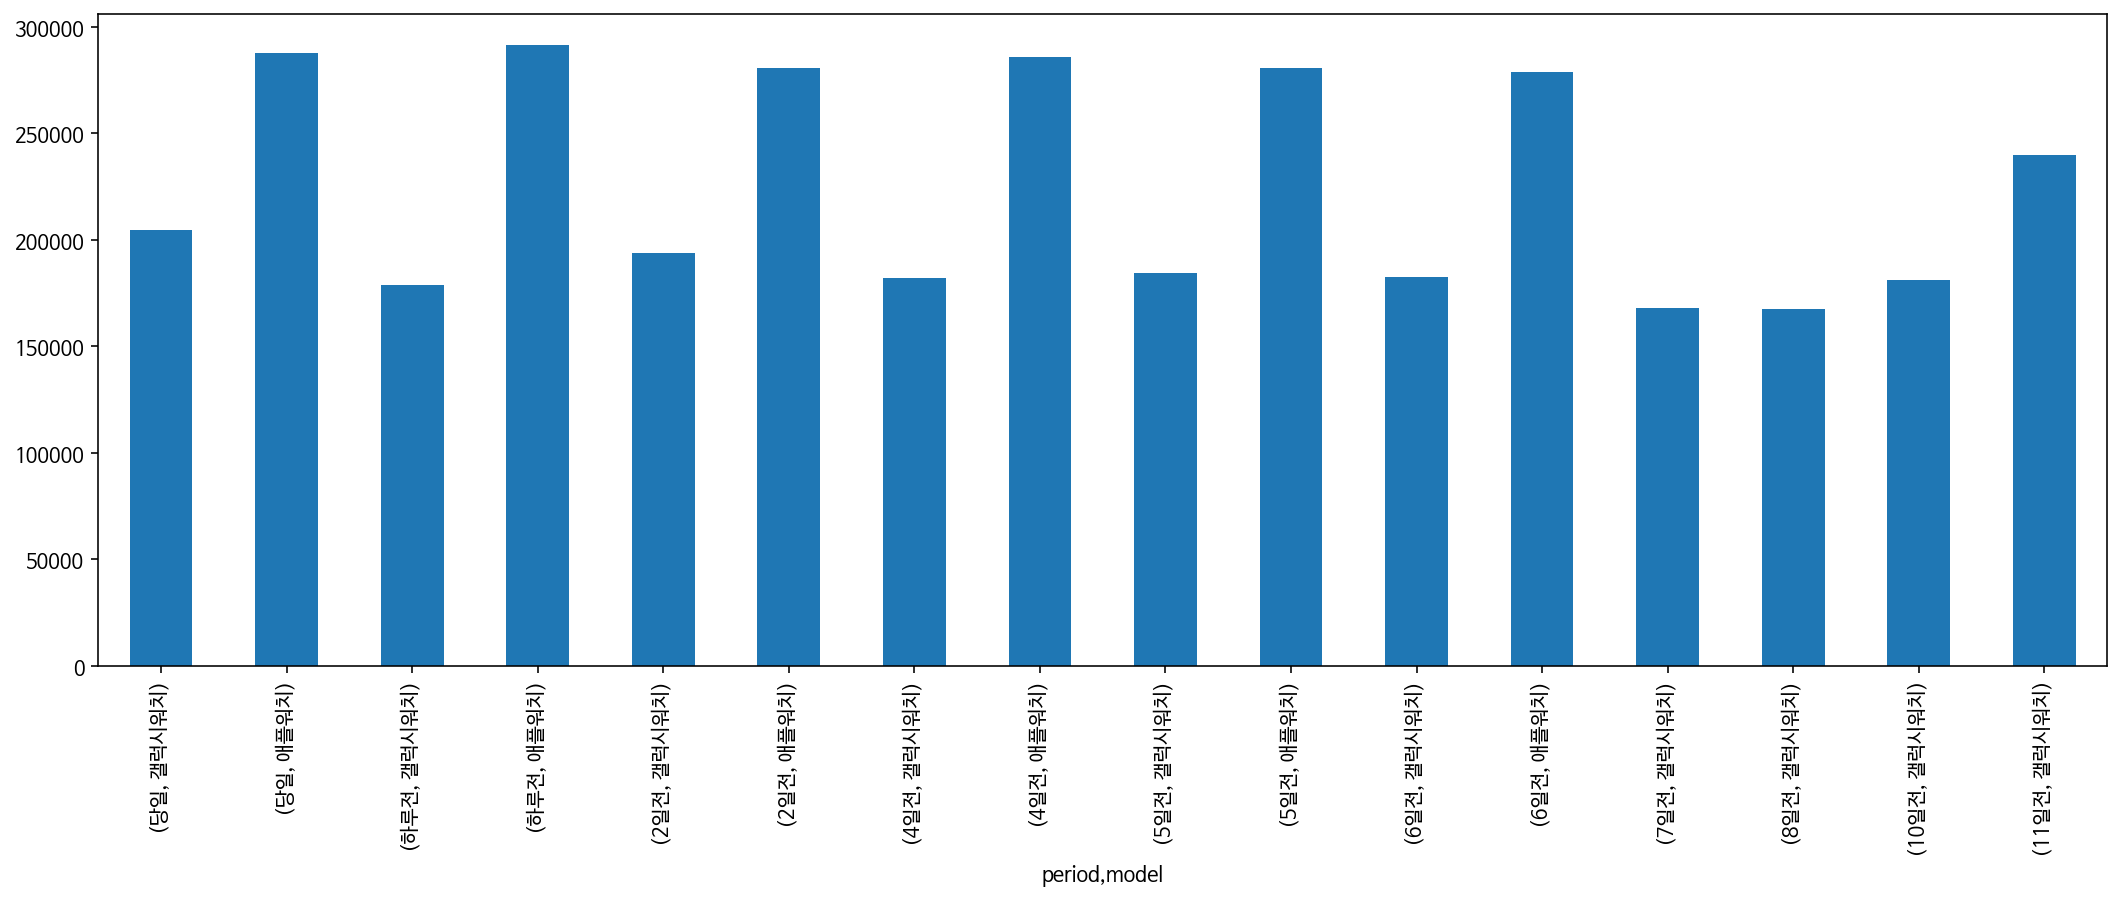

In [53]:
plt.figure(figsize=(18,6))

df_agg = df_time.groupby(['period', 'model']).price.mean()
df_agg = df_agg.loc[id]
df_agg.plot.bar();

In [54]:
df.edition

0        일반
1        일반
2        일반
3        일반
4        일반
         ..
12770    일반
12771    골프
12773    일반
12774    일반
12775    일반
Name: edition, Length: 11976, dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11976 entries, 0 to 12775
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          11976 non-null  object 
 1   price          11976 non-null  int64  
 2   article        11976 non-null  object 
 3   like           11976 non-null  int64  
 4   view           11976 non-null  int64  
 5   category       11976 non-null  object 
 6   location       11976 non-null  object 
 7   time           8474 non-null   float64
 8   web_types      11976 non-null  int64  
 9   unused         11976 non-null  int64  
 10  model          11976 non-null  object 
 11  series         11976 non-null  object 
 12  size           11976 non-null  object 
 13  gps/cell       11976 non-null  object 
 14  edition        11976 non-null  object 
 15  material       11976 non-null  object 
 16  like/views(%)  11976 non-null  float64
 17  quality        11976 non-null  object 
 18  averag

## 모델 시리즈별 시세

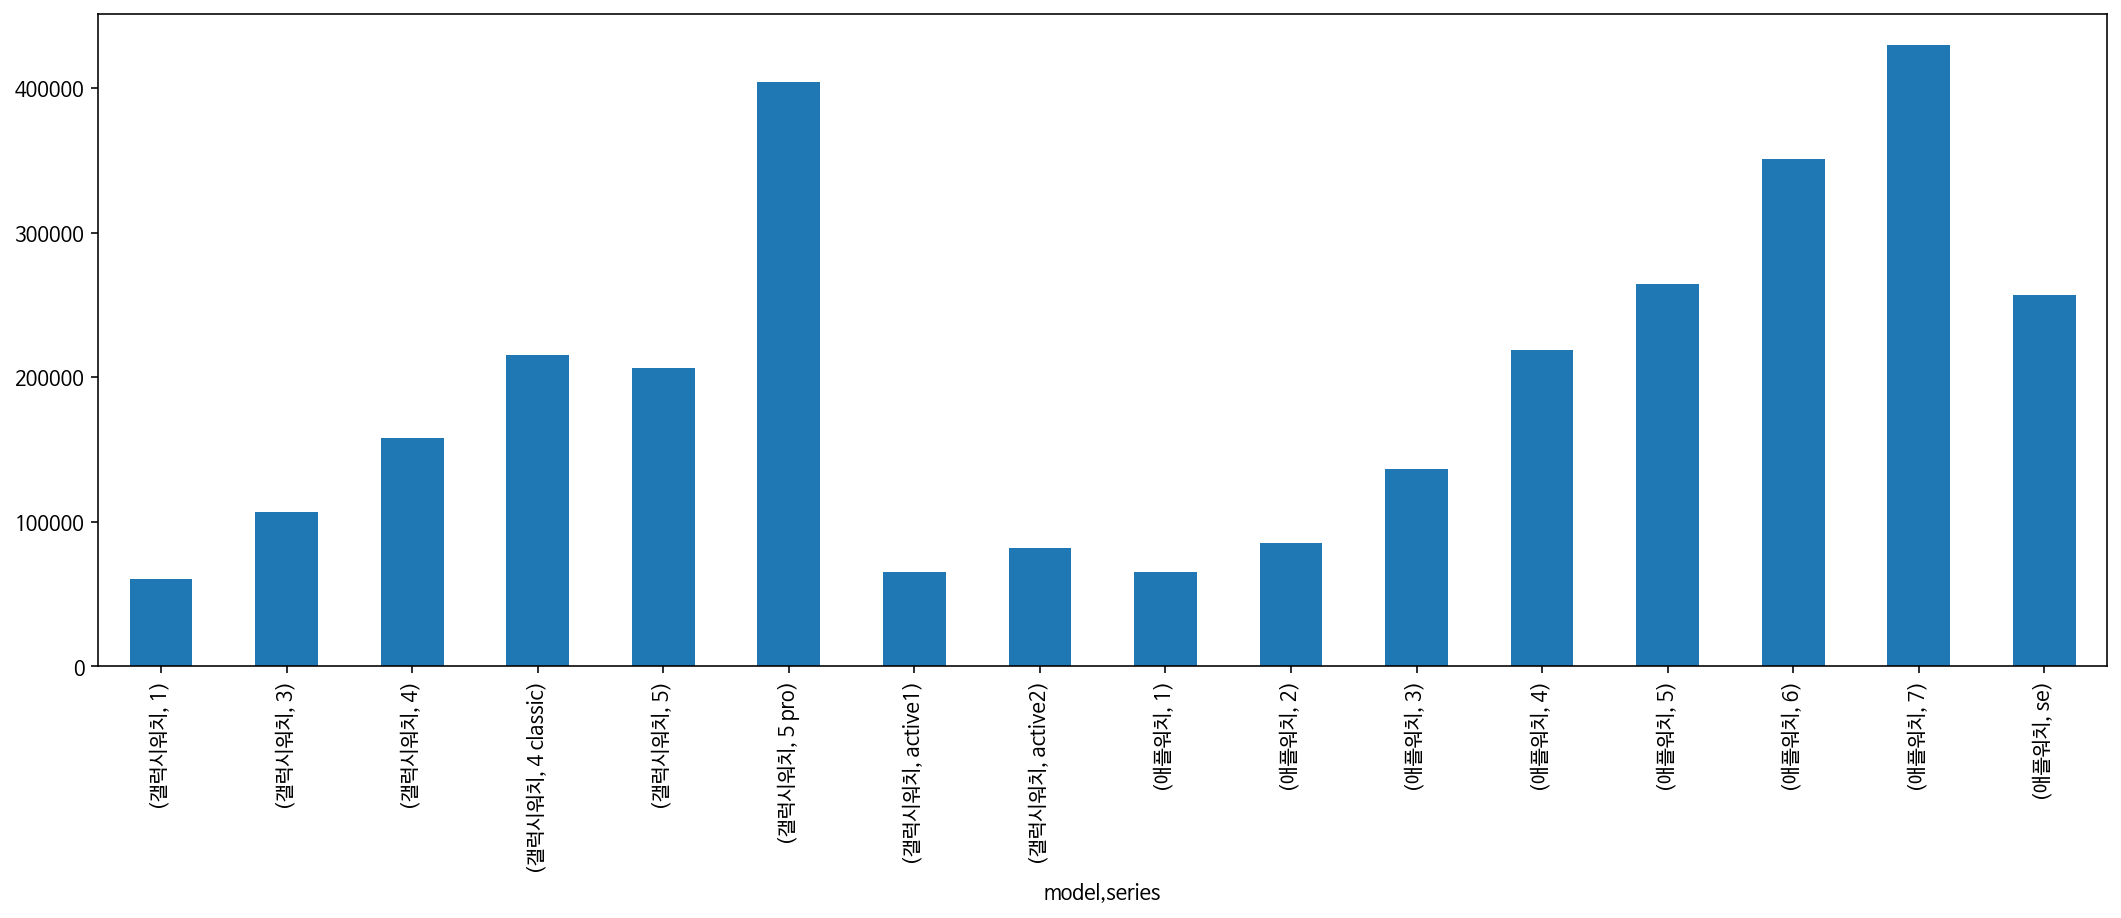

In [56]:
plt.figure(figsize=(18,6))

df.groupby(['model','series']).price.mean().plot.bar();

In [57]:
df.category.unique()

array(['디지털기기', '웨어러블(워치)', '기타(모바일)', '여성잡화', '스포츠/레저', '생활가전', '여성 시계',
       '케이블/충전기/주변기기', '기타(시계)', '이어폰/헤드폰', '스마트폰', '케이스/보호필름/액세서리',
       '기타(가전제품)', '남성패션/잡화', '남성 시계', '기타 중고물품', '기타', '반려동물용품',
       '기타 액세서리', '태블릿', '시계/쥬얼리', '생활/주방', '노트북/넷북', '기타(오디오/영상/관련기기)',
       '기타 골프 용품', '티켓/교환권'], dtype=object)

In [58]:
df.isna().sum()

title               0
price               0
article             0
like                0
view                0
category            0
location            0
time             3502
web_types           0
unused              0
model               0
series              0
size                0
gps/cell            0
edition             0
material            0
like/views(%)       0
quality             0
average_price       0
attention           0
like(%)             0
view(%)             0
attention(%)        0
dtype: int64

In [59]:
df.to_csv('real_real_df.csv')

In [60]:
df.columns

Index(['title', 'price', 'article', 'like', 'view', 'category', 'location',
       'time', 'web_types', 'unused', 'model', 'series', 'size', 'gps/cell',
       'edition', 'material', 'like/views(%)', 'quality', 'average_price',
       'attention', 'like(%)', 'view(%)', 'attention(%)'],
      dtype='object')

In [61]:
df.head(3)

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
0,애플워치 7 스테인리스 41mm실버 팝니다,600000,\n구매후 실착용 10번도 하지 않은 상태 좋은 애플워치 7 스테인리스 팝니다\n배...,14,1164,디지털기기,충북,0.166667,0,0,...,gps,일반,stainless,1.202749,중,635185.185185,71.50,2.405498,2.414287,2.405938
1,애플워치7 41mm 스테인리스 미사용팝니다,650000,\n처음에 한번켜보고 초기셋팅후 바로 박스에 보관되었던 제품입니다\n본체만입니다 밀...,3,118,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.542373,중,635185.185185,8.75,0.515464,0.244747,0.501928
2,애플워치7 41mm 스테인리스 실버 미사용팝니다,650000,\n본체만 있습니다 밀레니즈루프줄은 팔리고 없습니다\n스타라이트 스포츠밴드 하나 가...,3,123,디지털기기,서울,0.541667,0,0,...,gps,일반,stainless,2.439024,중,635185.185185,9.00,0.515464,0.255118,0.502447


# 특성 정보

model : 애플워치, 갤럭시워치  
series : 시리즈별  
size : 사이즈별  
gps/cell : (애플)gps, cell, (번개장터)bluetooth, LTE  
edition : 일반, 에르메스, 골프  
material : aluminium, stainless, titanum  
quality :  상, 중, 하 
unused : 0, 1    
location : 지역별   
price: 가격   
attention  :  like 95% + view 5%

In [68]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# # 새로 수집
# df = pd.read_csv('/content/drive/MyDrive/real_real_df.csv', encoding= 'utf-8').drop('Unnamed: 0', axis = 1)

In [70]:
df_model = df[['model', 'series',  'size', 'gps/cell', 'edition', 'material',  'quality', 'unused', 'location', 'price','attention']]

In [73]:
df_model.isna().sum()

model        0
series       0
size         0
gps/cell     0
edition      0
material     0
quality      0
unused       0
location     0
price        0
attention    0
dtype: int64

In [74]:
df = pd.read_csv('/content/real_real_df.csv', encoding= 'utf-8').drop('Unnamed: 0', axis = 1)

In [75]:
df[df.unused == 1].head(10)

,title,price,article,like,view,category,location,time,web_types,unused,...,gps/cell,edition,material,like/views(%),quality,average_price,attention,like(%),view(%),attention(%)
19,애플워치 7 41mm 셀룰러 스테인리스 어비스 블루 팝니다.,689000,"\n미개봉 새상품 \nApple 애플워치 7, 41mm, GPS+Cellular, ...",4,215,디지털기기,서울,1.000000,0,1,...,cellular,일반,stainless,1.860465,상,652166.666667,14.55,0.687285,0.445938,0.675218
22,[무료배송][새상품]애플워치7 41mm 스테인리스 셀룰러,800000,회사에서 받았는데 저는 모든 기기를 삼성 제품 사용하고 있어서 판매합니다 !!!!\...,4,453,웨어러블(워치),경기도,NaN,1,1,...,cellular,일반,stainless,0.883002,상,652166.666667,26.45,0.687285,0.939581,0.699900
23,애플워치7 41mm 셀룰러 그래파이트 스테인리스 새상품,780000,Apple 애플워치 7 41mm 셀룰러 그래파이트 스테인리스 스틸 케이스 그래파이트...,4,494,웨어러블(워치),전국,NaN,1,1,...,cellular,일반,stainless,0.809717,상,652166.666667,28.50,0.687285,1.024620,0.704152
26,애플워치7 스테인리스 41mm 셀룰러,580000,단순개봉 미사용 \n구성품 미사용 \n자급제 모델\n선물 가능 새상품 컨디션 \n배...,2,67,웨어러블(워치),광주,NaN,1,1,...,cellular,일반,stainless,2.985075,상,652166.666667,5.25,0.343643,0.138967,0.333409
34,애플워치7 스타라이트 GPS 41mm,399000,\n이미 44를 사용중이라 보관 해두고있는 41은 판매하려고합니다 :) \n2022...,0,23,디지털기기,대구,0.019000,0,1,...,gps,일반,aluminium,0.000000,상,381197.586727,1.15,0.000000,0.047705,0.002385
36,"애플워치7 그린 41mm gps S급, 신품급 판매합니다.",360000,"\n애플워치7 그린 41mm gps S급, 신품급 판매합니다. \n사진처럼 보증기간...",1,37,디지털기기,서울,0.022000,0,1,...,gps,일반,aluminium,2.702703,상,381197.586727,2.80,0.171821,0.076743,0.167067
37,"애플워치7 그린 41mm gps S급, 신품급 판매합니다.",360000,"\n애플워치7 그린 41mm gps S급, 신품급 판매합니다. \n사진처럼 보증기간...",1,21,디지털기기,서울,0.023000,0,1,...,gps,일반,aluminium,4.761905,상,381197.586727,2.00,0.171821,0.043557,0.165408
48,"미개봉 애플워치7 41mm 원가 450,000",360000,\n미개봉 애플워치7 41mm 미드나잇 색상 판매 합니다.\n그냥 개봉 안 한 새상...,2,63,디지털기기,경남,0.166667,0,1,...,gps,일반,aluminium,3.174603,상,381197.586727,5.05,0.343643,0.130670,0.332994
51,미개봉) 애플워치7 41mm미드나이트 gps 새상품 팝니다.,390000,\n애플워치7 41mm 미드나이트 gps 미개봉 새상품 팔아요.\n2022년 8월 ...,6,53,디지털기기,서울,0.166667,0,1,...,gps,일반,aluminium,11.320755,상,381197.586727,8.35,1.030928,0.109929,0.984878
59,애플워치7 미드나이트 gps 41mm 미개봉,400000,\n미개봉 새제품입니다\n,5,114,디지털기기,경북,0.291667,0,1,...,gps,일반,aluminium,4.385965,상,381197.586727,10.45,0.859107,0.236451,0.827974


In [76]:
df_model['unused'] = [str(x) for x in df_model['unused']]

In [77]:
df_model.shape

(11976, 11)

#모델링

In [78]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11976 entries, 0 to 12775
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      11976 non-null  object 
 1   series     11976 non-null  object 
 2   size       11976 non-null  object 
 3   gps/cell   11976 non-null  object 
 4   edition    11976 non-null  object 
 5   material   11976 non-null  object 
 6   quality    11976 non-null  object 
 7   unused     11976 non-null  object 
 8   location   11976 non-null  object 
 9   price      11976 non-null  int64  
 10  attention  11976 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB


In [79]:
# target이 attention일지 like 일지 미지정, 만약 둘중에 고르면 과적합 방지를 위해 하나를 제거할 예정!
target = 'attention'
X = df_model.drop(columns = target)
y = df_model[target]
# 훈련, 테스트 데이터로 크게 먼저 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, train_size = 0.85, random_state = 2, shuffle = True)
# 훈련데이터에서 훈련, 검증 데이터로 나눔
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, train_size = 0.8, random_state = 2, shuffle= True)

In [80]:
print('X_train shape :', X_train.shape, ', y_train shape :', y_train.shape)
print('X_val shape :', X_val.shape, ', y_val shape :', y_val.shape)
print('X_test shape :', X_test.shape, ', y_test shape :', y_test.shape)

X_train shape : (8143, 10) , y_train shape : (8143,)
X_val shape : (2036, 10) , y_val shape : (2036,)
X_test shape : (1797, 10) , y_test shape : (1797,)


##Linear Regression

In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


pipe = make_pipeline(
    OrdinalEncoder(),
    LinearRegression()
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

print('baseline rmse :', mse(y_val, y_pred)**0.5)
print('baseline r2 :', r2_score(y_val, y_pred))

# Linear 예측값
pipe.predict(X_test)

baseline rmse : 26.666438190719475
baseline r2 : 0.003407786847520411


array([17.51742657, 19.24398875, 15.61367449, ..., 19.06808339,
       19.58595748, 20.2488972 ])

##CatBoost Rressor

TargetEncoder

In [82]:
from category_encoders import TargetEncoder
from catboost import CatBoostRegressor

pipe = make_pipeline(
    TargetEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.1977412	total: 59.6ms	remaining: 59.6s
1:	learn: 24.1584824	total: 66.5ms	remaining: 33.2s
2:	learn: 24.1163035	total: 84.3ms	remaining: 28s
3:	learn: 24.0935325	total: 88.4ms	remaining: 22s
4:	learn: 24.0584031	total: 94.4ms	remaining: 18.8s
5:	learn: 24.0235759	total: 100ms	remaining: 16.6s
6:	learn: 24.0075614	total: 106ms	remaining: 15.1s
7:	learn: 23.9833629	total: 113ms	remaining: 14s
8:	learn: 23.9516234	total: 119ms	remaining: 13.1s
9:	learn: 23.9126087	total: 125ms	remaining: 12.4s
10:	learn: 23.8959985	total: 135ms	remaining: 12.2s
11:	learn: 23.8785897	total: 139ms	remaining: 11.4s
12:	learn: 23.8554661	total: 145ms	remaining: 11s
13:	learn: 23.8406892	total: 150ms	remaining: 10.6s
14:	learn: 23.8252920	total: 157ms	remaining: 10.3s
15:	learn: 23.7915594	total: 165ms	remaining: 10.1s
16:	learn: 23.7802649	total: 168ms	remaining: 9.73s
17:	learn: 23.7451849	total: 187ms	remaining: 10.2s
18:	learn: 23.7154704	total: 192ms	remaining: 9

BackwardDifferenceEncoder

In [83]:
from category_encoders import BackwardDifferenceEncoder

pipe = make_pipeline(
    BackwardDifferenceEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

# Linear 예측값
pipe.predict(X_test)

Learning rate set to 0.057027
0:	learn: 24.2279756	total: 19.8ms	remaining: 19.8s
1:	learn: 24.2002601	total: 27ms	remaining: 13.5s
2:	learn: 24.1634625	total: 30.8ms	remaining: 10.2s
3:	learn: 24.1259047	total: 34.5ms	remaining: 8.59s
4:	learn: 24.1075416	total: 39.7ms	remaining: 7.91s
5:	learn: 24.0923992	total: 46ms	remaining: 7.61s
6:	learn: 24.0698855	total: 51.3ms	remaining: 7.28s
7:	learn: 24.0622288	total: 54.8ms	remaining: 6.79s
8:	learn: 24.0445427	total: 59.1ms	remaining: 6.5s
9:	learn: 24.0200360	total: 62.9ms	remaining: 6.23s
10:	learn: 24.0126696	total: 66.6ms	remaining: 5.99s
11:	learn: 23.9806666	total: 71.6ms	remaining: 5.89s
12:	learn: 23.9608824	total: 75.1ms	remaining: 5.7s
13:	learn: 23.9452052	total: 79.4ms	remaining: 5.59s
14:	learn: 23.9245924	total: 83.3ms	remaining: 5.47s
15:	learn: 23.9127445	total: 95.4ms	remaining: 5.87s
16:	learn: 23.9003649	total: 107ms	remaining: 6.16s
17:	learn: 23.8684911	total: 116ms	remaining: 6.3s
18:	learn: 23.8653303	total: 118ms	

array([15.95816666, 19.37856753, 10.91360287, ..., 18.87611766,
       23.74518734, 14.57895351])

CatBoostEncoder

In [84]:
from category_encoders import CatBoostEncoder

pipe = make_pipeline(
    CatBoostEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2237573	total: 5.57ms	remaining: 5.56s
1:	learn: 24.1909401	total: 10.3ms	remaining: 5.14s
2:	learn: 24.1728647	total: 14.8ms	remaining: 4.93s
3:	learn: 24.1393211	total: 19.3ms	remaining: 4.8s
4:	learn: 24.1257131	total: 23.3ms	remaining: 4.64s
5:	learn: 24.1070546	total: 27.5ms	remaining: 4.56s
6:	learn: 24.0724380	total: 31.6ms	remaining: 4.49s
7:	learn: 24.0390137	total: 35.9ms	remaining: 4.45s
8:	learn: 24.0255836	total: 40.2ms	remaining: 4.43s
9:	learn: 24.0115822	total: 44.5ms	remaining: 4.4s
10:	learn: 23.9978132	total: 48.5ms	remaining: 4.36s
11:	learn: 23.9629975	total: 52.6ms	remaining: 4.33s
12:	learn: 23.9502027	total: 56.8ms	remaining: 4.31s
13:	learn: 23.9396190	total: 60.8ms	remaining: 4.28s
14:	learn: 23.9310699	total: 64.8ms	remaining: 4.26s
15:	learn: 23.9098404	total: 69ms	remaining: 4.24s
16:	learn: 23.8983095	total: 73ms	remaining: 4.22s
17:	learn: 23.8880205	total: 77.2ms	remaining: 4.21s
18:	learn: 23.8825284	total: 81.

CountEncoder

In [85]:
from category_encoders import CountEncoder

pipe = make_pipeline(
    CountEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2034372	total: 7.18ms	remaining: 7.18s
1:	learn: 24.1796877	total: 12.3ms	remaining: 6.15s
2:	learn: 24.1358779	total: 17.8ms	remaining: 5.9s
3:	learn: 24.1160370	total: 21.7ms	remaining: 5.41s
4:	learn: 24.1008519	total: 24.3ms	remaining: 4.84s
5:	learn: 24.0846780	total: 27.9ms	remaining: 4.62s
6:	learn: 24.0706153	total: 30.5ms	remaining: 4.33s
7:	learn: 24.0518008	total: 32.6ms	remaining: 4.05s
8:	learn: 24.0162462	total: 34.9ms	remaining: 3.84s
9:	learn: 24.0022378	total: 37.9ms	remaining: 3.75s
10:	learn: 23.9708022	total: 42.5ms	remaining: 3.83s
11:	learn: 23.9391446	total: 48.2ms	remaining: 3.97s
12:	learn: 23.9118793	total: 50.8ms	remaining: 3.86s
13:	learn: 23.8934595	total: 52.8ms	remaining: 3.72s
14:	learn: 23.8658026	total: 55.8ms	remaining: 3.66s
15:	learn: 23.8389989	total: 60.2ms	remaining: 3.7s
16:	learn: 23.8035504	total: 65.3ms	remaining: 3.77s
17:	learn: 23.7825310	total: 68.7ms	remaining: 3.75s
18:	learn: 23.7509187	total:

GLMMEncoder

In [86]:
# from category_encoders import GLMMEncoder

# pipe = make_pipeline(
#     GLMMEncoder(), 
#     CatBoostRegressor(loss_function= 'RMSE') 
# )

# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_val)
# r2 = r2_score(y_val, y_pred) # Val r2_score
# print('catboost rmse :', mse(y_val, y_pred)**0.5)
# print('catboost r2 :', r2_score(y_val, y_pred))

ValueError: ignored

HashingEncoder

In [87]:
from category_encoders import HashingEncoder

pipe = make_pipeline(
    HashingEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2136128	total: 5.7ms	remaining: 5.69s
1:	learn: 24.1894872	total: 12ms	remaining: 5.98s
2:	learn: 24.1647152	total: 17.6ms	remaining: 5.86s
3:	learn: 24.1417111	total: 22.9ms	remaining: 5.7s
4:	learn: 24.1193927	total: 33.9ms	remaining: 6.75s
5:	learn: 24.0941910	total: 61.6ms	remaining: 10.2s
6:	learn: 24.0735729	total: 66.4ms	remaining: 9.41s
7:	learn: 24.0525966	total: 77.5ms	remaining: 9.61s
8:	learn: 24.0322515	total: 80.6ms	remaining: 8.87s
9:	learn: 24.0133257	total: 83.2ms	remaining: 8.23s
10:	learn: 23.9950060	total: 89.5ms	remaining: 8.05s
11:	learn: 23.9770989	total: 98.7ms	remaining: 8.13s
12:	learn: 23.9590165	total: 102ms	remaining: 7.73s
13:	learn: 23.9410309	total: 118ms	remaining: 8.3s
14:	learn: 23.9245286	total: 122ms	remaining: 8.01s
15:	learn: 23.9082102	total: 126ms	remaining: 7.75s
16:	learn: 23.8927097	total: 131ms	remaining: 7.56s
17:	learn: 23.8769730	total: 136ms	remaining: 7.4s
18:	learn: 23.8602477	total: 141ms	rem

BaseNEncoder

In [88]:
from category_encoders import BaseNEncoder

pipe = make_pipeline(
    BaseNEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2126317	total: 4.34ms	remaining: 4.33s
1:	learn: 24.1874448	total: 12.1ms	remaining: 6.05s
2:	learn: 24.1692657	total: 18.9ms	remaining: 6.28s
3:	learn: 24.1272446	total: 24.9ms	remaining: 6.21s
4:	learn: 24.0897250	total: 29.4ms	remaining: 5.85s
5:	learn: 24.0727280	total: 33.7ms	remaining: 5.59s
6:	learn: 24.0381475	total: 37.7ms	remaining: 5.35s
7:	learn: 24.0172451	total: 43ms	remaining: 5.33s
8:	learn: 23.9775053	total: 47.1ms	remaining: 5.19s
9:	learn: 23.9473055	total: 51.2ms	remaining: 5.07s
10:	learn: 23.9278453	total: 56.9ms	remaining: 5.11s
11:	learn: 23.8924097	total: 68.4ms	remaining: 5.63s
12:	learn: 23.8676614	total: 72.7ms	remaining: 5.52s
13:	learn: 23.8400417	total: 84.8ms	remaining: 5.97s
14:	learn: 23.8297456	total: 95.7ms	remaining: 6.29s
15:	learn: 23.8147712	total: 105ms	remaining: 6.45s
16:	learn: 23.7862793	total: 110ms	remaining: 6.33s
17:	learn: 23.7581595	total: 118ms	remaining: 6.43s
18:	learn: 23.7333824	total: 13

CountEncoder

In [89]:
from category_encoders import CountEncoder

pipe = make_pipeline(
    CountEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2034372	total: 2.36ms	remaining: 2.35s
1:	learn: 24.1796877	total: 4.76ms	remaining: 2.38s
2:	learn: 24.1358779	total: 7.2ms	remaining: 2.39s
3:	learn: 24.1160370	total: 9.58ms	remaining: 2.38s
4:	learn: 24.1008519	total: 12ms	remaining: 2.38s
5:	learn: 24.0846780	total: 14.4ms	remaining: 2.38s
6:	learn: 24.0706153	total: 16.8ms	remaining: 2.38s
7:	learn: 24.0518008	total: 19.2ms	remaining: 2.38s
8:	learn: 24.0162462	total: 21.6ms	remaining: 2.38s
9:	learn: 24.0022378	total: 24ms	remaining: 2.38s
10:	learn: 23.9708022	total: 26.2ms	remaining: 2.36s
11:	learn: 23.9391446	total: 28.3ms	remaining: 2.33s
12:	learn: 23.9118793	total: 30.6ms	remaining: 2.33s
13:	learn: 23.8934595	total: 33ms	remaining: 2.32s
14:	learn: 23.8658026	total: 35.3ms	remaining: 2.32s
15:	learn: 23.8389989	total: 37.8ms	remaining: 2.33s
16:	learn: 23.8035504	total: 40.2ms	remaining: 2.32s
17:	learn: 23.7825310	total: 42.2ms	remaining: 2.3s
18:	learn: 23.7509187	total: 44.7m

GLMMEncoder

In [90]:
from category_encoders import GLMMEncoder

pipe = make_pipeline(
    CountEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2034372	total: 2.33ms	remaining: 2.33s
1:	learn: 24.1796877	total: 4.74ms	remaining: 2.37s
2:	learn: 24.1358779	total: 7.26ms	remaining: 2.41s
3:	learn: 24.1160370	total: 9.45ms	remaining: 2.35s
4:	learn: 24.1008519	total: 11.5ms	remaining: 2.3s
5:	learn: 24.0846780	total: 13.7ms	remaining: 2.28s
6:	learn: 24.0706153	total: 16.1ms	remaining: 2.28s
7:	learn: 24.0518008	total: 18.7ms	remaining: 2.31s
8:	learn: 24.0162462	total: 20.9ms	remaining: 2.3s
9:	learn: 24.0022378	total: 23ms	remaining: 2.28s
10:	learn: 23.9708022	total: 25.2ms	remaining: 2.26s
11:	learn: 23.9391446	total: 27.4ms	remaining: 2.26s
12:	learn: 23.9118793	total: 29.7ms	remaining: 2.25s
13:	learn: 23.8934595	total: 32.3ms	remaining: 2.27s
14:	learn: 23.8658026	total: 34.4ms	remaining: 2.26s
15:	learn: 23.8389989	total: 36.8ms	remaining: 2.26s
16:	learn: 23.8035504	total: 39.2ms	remaining: 2.27s
17:	learn: 23.7825310	total: 41ms	remaining: 2.24s
18:	learn: 23.7509187	total: 43.

HashingEncoder

In [91]:
from category_encoders import HashingEncoder

pipe = make_pipeline(
    HashingEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2136128	total: 2.38ms	remaining: 2.37s
1:	learn: 24.1894872	total: 4.63ms	remaining: 2.31s
2:	learn: 24.1647152	total: 6.79ms	remaining: 2.26s
3:	learn: 24.1417111	total: 8.33ms	remaining: 2.08s
4:	learn: 24.1193927	total: 10.5ms	remaining: 2.09s
5:	learn: 24.0941910	total: 12.7ms	remaining: 2.11s
6:	learn: 24.0735729	total: 14.2ms	remaining: 2.01s
7:	learn: 24.0525966	total: 16.4ms	remaining: 2.03s
8:	learn: 24.0322515	total: 18.5ms	remaining: 2.04s
9:	learn: 24.0133257	total: 20ms	remaining: 1.98s
10:	learn: 23.9950060	total: 22.9ms	remaining: 2.06s
11:	learn: 23.9770989	total: 24.4ms	remaining: 2.01s
12:	learn: 23.9590165	total: 26.4ms	remaining: 2s
13:	learn: 23.9410309	total: 28.4ms	remaining: 2s
14:	learn: 23.9245286	total: 30ms	remaining: 1.97s
15:	learn: 23.9082102	total: 32.1ms	remaining: 1.97s
16:	learn: 23.8927097	total: 33.5ms	remaining: 1.94s
17:	learn: 23.8769730	total: 35.3ms	remaining: 1.92s
18:	learn: 23.8602477	total: 37.4ms	

HelmertEncoder

In [92]:
from category_encoders import HelmertEncoder

pipe = make_pipeline(
    HelmertEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2247915	total: 6.22ms	remaining: 6.22s
1:	learn: 24.2094195	total: 9.26ms	remaining: 4.62s
2:	learn: 24.1825865	total: 12.5ms	remaining: 4.15s
3:	learn: 24.1397384	total: 16.3ms	remaining: 4.05s
4:	learn: 24.0995136	total: 19.8ms	remaining: 3.95s
5:	learn: 24.0589282	total: 23.1ms	remaining: 3.82s
6:	learn: 24.0436761	total: 26ms	remaining: 3.68s
7:	learn: 24.0221969	total: 29ms	remaining: 3.6s
8:	learn: 24.0119679	total: 32ms	remaining: 3.52s
9:	learn: 23.9726732	total: 35.2ms	remaining: 3.49s
10:	learn: 23.9560277	total: 38.4ms	remaining: 3.46s
11:	learn: 23.9384591	total: 41.6ms	remaining: 3.43s
12:	learn: 23.9061845	total: 44.7ms	remaining: 3.39s
13:	learn: 23.8787288	total: 48.3ms	remaining: 3.4s
14:	learn: 23.8538710	total: 51.5ms	remaining: 3.38s
15:	learn: 23.8171783	total: 55.1ms	remaining: 3.39s
16:	learn: 23.7868926	total: 58.1ms	remaining: 3.36s
17:	learn: 23.7493944	total: 61.5ms	remaining: 3.36s
18:	learn: 23.7272545	total: 64.7m

JamesSteinEncoder

In [93]:
from category_encoders import JamesSteinEncoder

pipe = make_pipeline(
    JamesSteinEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.1998158	total: 2.09ms	remaining: 2.09s
1:	learn: 24.1605376	total: 4.55ms	remaining: 2.27s
2:	learn: 24.1182255	total: 7.13ms	remaining: 2.37s
3:	learn: 24.0979394	total: 9.49ms	remaining: 2.36s
4:	learn: 24.0629294	total: 12ms	remaining: 2.39s
5:	learn: 24.0209186	total: 14.6ms	remaining: 2.41s
6:	learn: 24.0059927	total: 17.1ms	remaining: 2.43s
7:	learn: 23.9794440	total: 19.3ms	remaining: 2.39s
8:	learn: 23.9477803	total: 21.9ms	remaining: 2.41s
9:	learn: 23.9087573	total: 24.3ms	remaining: 2.4s
10:	learn: 23.8920105	total: 26.8ms	remaining: 2.41s
11:	learn: 23.8746651	total: 29.1ms	remaining: 2.4s
12:	learn: 23.8518155	total: 31.7ms	remaining: 2.41s
13:	learn: 23.8357415	total: 33.8ms	remaining: 2.38s
14:	learn: 23.8201629	total: 36.4ms	remaining: 2.39s
15:	learn: 23.7862372	total: 38.5ms	remaining: 2.37s
16:	learn: 23.7767463	total: 40.6ms	remaining: 2.35s
17:	learn: 23.7497718	total: 43.1ms	remaining: 2.35s
18:	learn: 23.7204754	total: 4

LeaverOneOutEncoder

In [94]:
from category_encoders import LeaveOneOutEncoder

pipe = make_pipeline(
    LeaveOneOutEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 23.1544183	total: 8.66ms	remaining: 8.65s
1:	learn: 22.0727550	total: 13.5ms	remaining: 6.75s
2:	learn: 21.1143081	total: 17.6ms	remaining: 5.86s
3:	learn: 20.2031973	total: 21.8ms	remaining: 5.42s
4:	learn: 19.3513828	total: 25.9ms	remaining: 5.16s
5:	learn: 18.5526777	total: 29.9ms	remaining: 4.95s
6:	learn: 17.7649040	total: 33.9ms	remaining: 4.81s
7:	learn: 17.0286612	total: 38.4ms	remaining: 4.77s
8:	learn: 16.3305865	total: 42.7ms	remaining: 4.7s
9:	learn: 15.6374771	total: 46.7ms	remaining: 4.63s
10:	learn: 14.9618466	total: 50.8ms	remaining: 4.57s
11:	learn: 14.3329730	total: 54.8ms	remaining: 4.51s
12:	learn: 13.7441097	total: 58.9ms	remaining: 4.47s
13:	learn: 13.2049576	total: 62.9ms	remaining: 4.43s
14:	learn: 12.6884828	total: 67.2ms	remaining: 4.41s
15:	learn: 12.1543301	total: 71.5ms	remaining: 4.4s
16:	learn: 11.7071274	total: 75.4ms	remaining: 4.36s
17:	learn: 11.2893661	total: 79.8ms	remaining: 4.36s
18:	learn: 10.8883671	total:

MEstimateEncoder

In [95]:
from category_encoders import MEstimateEncoder

pipe = make_pipeline(
    MEstimateEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.1977412	total: 2.12ms	remaining: 2.12s
1:	learn: 24.1584824	total: 4.75ms	remaining: 2.37s
2:	learn: 24.1163035	total: 7.13ms	remaining: 2.37s
3:	learn: 24.0935325	total: 9.32ms	remaining: 2.32s
4:	learn: 24.0584031	total: 11.4ms	remaining: 2.27s
5:	learn: 24.0235759	total: 13.9ms	remaining: 2.29s
6:	learn: 24.0075614	total: 15.9ms	remaining: 2.26s
7:	learn: 23.9833629	total: 18.4ms	remaining: 2.28s
8:	learn: 23.9516234	total: 20.6ms	remaining: 2.27s
9:	learn: 23.9126087	total: 23.1ms	remaining: 2.29s
10:	learn: 23.8959985	total: 25.2ms	remaining: 2.27s
11:	learn: 23.8785897	total: 27.6ms	remaining: 2.27s
12:	learn: 23.8554661	total: 29.7ms	remaining: 2.25s
13:	learn: 23.8406892	total: 31.8ms	remaining: 2.24s
14:	learn: 23.8252920	total: 34.3ms	remaining: 2.25s
15:	learn: 23.7915594	total: 36.7ms	remaining: 2.25s
16:	learn: 23.7802649	total: 39.1ms	remaining: 2.26s
17:	learn: 23.7451849	total: 41.4ms	remaining: 2.26s
18:	learn: 23.7154704	tota

PolynomialEncoder

In [96]:
from category_encoders import PolynomialEncoder

pipe = make_pipeline(
    PolynomialEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.1912220	total: 3.82ms	remaining: 3.81s
1:	learn: 24.1643635	total: 7.6ms	remaining: 3.79s
2:	learn: 24.1345846	total: 11.3ms	remaining: 3.76s
3:	learn: 24.0879558	total: 14.8ms	remaining: 3.68s
4:	learn: 24.0458640	total: 18.4ms	remaining: 3.67s
5:	learn: 24.0097358	total: 21.7ms	remaining: 3.59s
6:	learn: 23.9609099	total: 25.3ms	remaining: 3.58s
7:	learn: 23.9443255	total: 28.8ms	remaining: 3.56s
8:	learn: 23.9127910	total: 32.1ms	remaining: 3.54s
9:	learn: 23.8811857	total: 35.7ms	remaining: 3.53s
10:	learn: 23.8685284	total: 39.6ms	remaining: 3.56s
11:	learn: 23.8493222	total: 43.2ms	remaining: 3.55s
12:	learn: 23.8142314	total: 47ms	remaining: 3.56s
13:	learn: 23.7982856	total: 50.5ms	remaining: 3.56s
14:	learn: 23.7755793	total: 54.1ms	remaining: 3.55s
15:	learn: 23.7433486	total: 57.7ms	remaining: 3.55s
16:	learn: 23.7096402	total: 61.5ms	remaining: 3.56s
17:	learn: 23.6774901	total: 65ms	remaining: 3.55s
18:	learn: 23.6496214	total: 68

SumEncoder

In [97]:
from category_encoders import SumEncoder

pipe = make_pipeline(
    SumEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.2268532	total: 4.89ms	remaining: 4.89s
1:	learn: 24.1830274	total: 10.4ms	remaining: 5.17s
2:	learn: 24.1627300	total: 17.5ms	remaining: 5.8s
3:	learn: 24.1302535	total: 29.1ms	remaining: 7.24s
4:	learn: 24.0929550	total: 34.6ms	remaining: 6.89s
5:	learn: 24.0557405	total: 41.3ms	remaining: 6.85s
6:	learn: 24.0134218	total: 55.6ms	remaining: 7.89s
7:	learn: 24.0069917	total: 58.2ms	remaining: 7.21s
8:	learn: 23.9640439	total: 61.5ms	remaining: 6.77s
9:	learn: 23.9329348	total: 64.7ms	remaining: 6.4s
10:	learn: 23.8969098	total: 68ms	remaining: 6.11s
11:	learn: 23.8678506	total: 71.3ms	remaining: 5.87s
12:	learn: 23.8482397	total: 74.4ms	remaining: 5.65s
13:	learn: 23.8194817	total: 77.7ms	remaining: 5.47s
14:	learn: 23.8096578	total: 84.4ms	remaining: 5.54s
15:	learn: 23.7818281	total: 87.6ms	remaining: 5.39s
16:	learn: 23.7605747	total: 91.1ms	remaining: 5.27s
17:	learn: 23.7526130	total: 94.1ms	remaining: 5.13s
18:	learn: 23.7266997	total: 9

In [ ]:
# from category_encoders import PolynomialWrapper

# pipe = make_pipeline(
#     PolynomialWrapper(), 
#     CatBoostRegressor(loss_function= 'RMSE') 
# )

# pipe.fit(X_train, y_train)
# y_pred = pipe.predict(X_val)
# r2 = r2_score(y_val, y_pred) # Val r2_score
# print('catboost rmse :', mse(y_val, y_pred)**0.5)
# print('catboost r2 :', r2_score(y_val, y_pred))

QuantileEncoder

In [98]:
from category_encoders import QuantileEncoder

pipe = make_pipeline(
    QuantileEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.1977412	total: 2.15ms	remaining: 2.15s
1:	learn: 24.1565311	total: 4.63ms	remaining: 2.31s
2:	learn: 24.1152798	total: 6.71ms	remaining: 2.23s
3:	learn: 24.0972474	total: 8.79ms	remaining: 2.19s
4:	learn: 24.0868484	total: 10.8ms	remaining: 2.15s
5:	learn: 24.0707040	total: 12.8ms	remaining: 2.12s
6:	learn: 24.0378448	total: 15.1ms	remaining: 2.15s
7:	learn: 24.0020341	total: 17.4ms	remaining: 2.16s
8:	learn: 23.9845122	total: 19.7ms	remaining: 2.17s
9:	learn: 23.9465121	total: 22ms	remaining: 2.18s
10:	learn: 23.9115213	total: 24.3ms	remaining: 2.19s
11:	learn: 23.8742394	total: 26.4ms	remaining: 2.18s
12:	learn: 23.8522649	total: 28.7ms	remaining: 2.18s
13:	learn: 23.8227248	total: 31ms	remaining: 2.18s
14:	learn: 23.8121066	total: 33.1ms	remaining: 2.17s
15:	learn: 23.7794380	total: 35.1ms	remaining: 2.16s
16:	learn: 23.7549657	total: 37.4ms	remaining: 2.16s
17:	learn: 23.7249168	total: 39.6ms	remaining: 2.16s
18:	learn: 23.6942957	total: 4

SummaryEncoder

In [99]:
from category_encoders import SummaryEncoder


pipe = make_pipeline(
    SummaryEncoder(), 
    CatBoostRegressor(loss_function= 'RMSE') 
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

Learning rate set to 0.057027
0:	learn: 24.1989647	total: 2.32ms	remaining: 2.32s
1:	learn: 24.1747230	total: 5.11ms	remaining: 2.55s
2:	learn: 24.1431722	total: 7.53ms	remaining: 2.5s
3:	learn: 24.0998348	total: 9.86ms	remaining: 2.46s
4:	learn: 24.0853966	total: 12.6ms	remaining: 2.51s
5:	learn: 24.0493788	total: 15.3ms	remaining: 2.53s
6:	learn: 24.0359406	total: 17.7ms	remaining: 2.51s
7:	learn: 24.0127598	total: 20.3ms	remaining: 2.52s
8:	learn: 23.9852232	total: 22.9ms	remaining: 2.52s
9:	learn: 23.9680545	total: 25.6ms	remaining: 2.53s
10:	learn: 23.9558681	total: 29.9ms	remaining: 2.69s
11:	learn: 23.9464479	total: 33.1ms	remaining: 2.72s
12:	learn: 23.9332234	total: 35.7ms	remaining: 2.71s
13:	learn: 23.8983320	total: 38.4ms	remaining: 2.7s
14:	learn: 23.8877063	total: 40.7ms	remaining: 2.67s
15:	learn: 23.8443520	total: 43.4ms	remaining: 2.67s
16:	learn: 23.8352504	total: 45.8ms	remaining: 2.65s
17:	learn: 23.8214885	total: 48.3ms	remaining: 2.63s
18:	learn: 23.8098188	total:

TargetEncoder

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    CatBoostRegressor(loss_function = 'RMSE', random_state = 2) 
)

dists = {
    'catboostregressor__n_estimators': randint(100, 250), 
    'catboostregressor__max_depth': [5, 10, 13 ,15, 17, 20, 25],
    'catboostregressor__eval_metric' : ['RMSE', 'MAE', 'MSE', 'R2'],
    'catboostregressor__loss_function' : ['RMSE', 'MAE', 'MSE', 'R2']
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=100, 
    cv=5, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)
print('r2:',clf.score)
y_pred = clf.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

##XGBoost

In [100]:
from category_encoders import TargetEncoder
import xgboost as xgb

pipe = make_pipeline(
    TargetEncoder(), 
    xgb.XGBRegressor()
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))

[02:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
catboost rmse : 26.425449333432095
catboost r2 : 0.02133912063659016


## RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

pipe = make_pipeline(
    TargetEncoder(),  
    RandomForestRegressor(n_jobs=-1, random_state= 2)
)

dists = { 
    'randomforestregressor__n_estimators': randint(100, 500), 
    'randomforestregressor__max_depth': [5, 10, 13 ,15, 17, 20, 25], 
    'randomforestregressor__min_samples_leaf' : [1,3,6],
    'randomforestregressor__max_leaf_nodes' : [300, 500, 700, 1000],
    'randomforestregressor__max_features': ['sqrt', 'log2', None, 'auto'], # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
r2 = r2_score(y_val, y_pred) # Val r2_score
print('catboost rmse :', mse(y_val, y_pred)**0.5)
print('catboost r2 :', r2_score(y_val, y_pred))